<a href="https://colab.research.google.com/github/matiasrebori/air_quality_fuzzy_logic/blob/main/proyecto_aplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

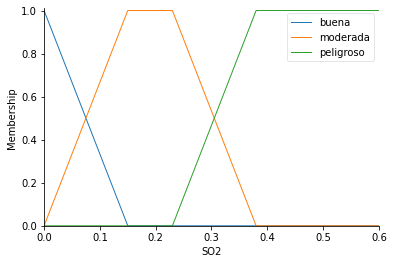

In [ ]:
so2 = ctrl.Antecedent(np.arange(0, 0.61, 0.01), 'SO2')
so2['buena'] = fuzz.trapmf(so2.universe, [0, 0, 0, 0.15])
so2['moderada'] = fuzz.trapmf(so2.universe, [0, 0.15, 0.23, 0.38])
so2['peligroso'] = fuzz.trapmf(so2.universe, [0.23, 0.38, 0.60, 0.60])
so2.view()

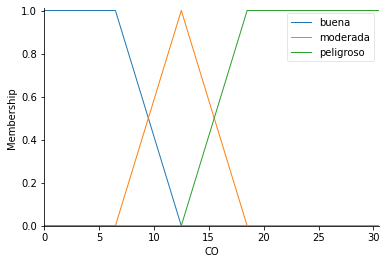

In [ ]:
co = ctrl.Antecedent(np.arange(0, 31, 0.5), 'CO')
co['buena'] = fuzz.trapmf(co.universe, [0, 0, 6.5, 12.5])
co['moderada'] = fuzz.trapmf(co.universe, [6.5, 12.5, 12.5, 18.5])
co['peligroso'] = fuzz.trapmf(co.universe, [12.5, 18.5, 30.5, 30.5])
co.view()

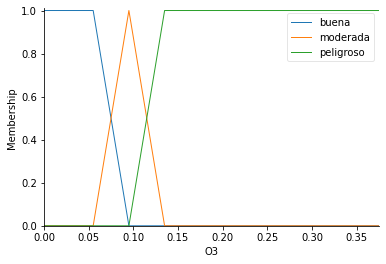

In [ ]:
o3 = ctrl.Antecedent(np.arange(0, 0.380, 0.005), 'O3')
o3['buena'] = fuzz.trapmf(o3.universe, [0, 0, 0.055, 0.095])
o3['moderada'] = fuzz.trapmf(o3.universe, [0.055, 0.095, 0.095, 0.135])
o3['peligroso'] = fuzz.trapmf(o3.universe, [0.095, 0.135, 0.375, 0.375])
o3.view()

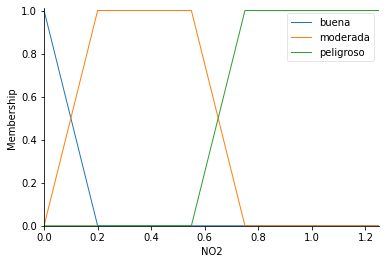

In [ ]:
no2 = ctrl.Antecedent(np.arange(0, 1.30, 0.05), 'NO2')
no2['buena'] = fuzz.trapmf(no2.universe, [0, 0, 0, 0.20])
no2['moderada'] = fuzz.trapmf(no2.universe, [0, 0.20, 0.55, 0.75])
no2['peligroso'] = fuzz.trapmf(no2.universe, [0.55, 0.75, 1.25, 1.25])
no2.view()

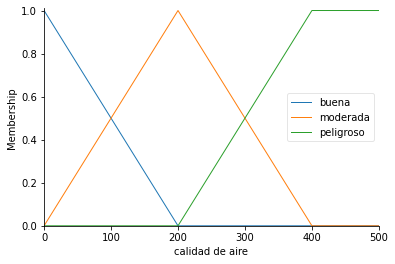

In [ ]:
# Definicion de la variable de salida calidad de aire, la longitud es hasta 501 porque cuando el paso es 1 np.arange no incluye el valor final del intervalo, defuzificar por el Método del Centroide
quality = ctrl.Consequent(np.arange(0, 600, 100), 'calidad de aire', 'centroid')
quality['buena'] = fuzz.trapmf(quality.universe, [0, 0, 0, 200])
quality['moderada'] = fuzz.trapmf(quality.universe, [0, 200, 200, 400])
quality['peligroso'] = fuzz.trapmf(quality.universe, [200, 400, 500, 500])
quality.view()

In [ ]:
# Definicion de reglas
regla1 = ctrl.Rule(so2['buena'] & co['buena'] & o3['buena'] & no2['buena'], quality['buena'])
regla2 = ctrl.Rule(so2['moderada'] & co['buena'] & o3['buena'] & no2['buena'], quality['buena'])
regla3 = ctrl.Rule(so2['peligroso'] & co['buena'] & o3['buena'] & no2['buena'], quality['buena'])
regla4 = ctrl.Rule(so2['buena'] & co['moderada'] & o3['buena'] & no2['buena'], quality['buena'])
regla5 = ctrl.Rule(so2['moderada'] & co['moderada'] & o3['buena'] & no2['buena'], quality['moderada'])
regla6 = ctrl.Rule(so2['peligroso'] & co['moderada'] & o3['buena'] & no2['buena'], quality['moderada'])
regla7 = ctrl.Rule(so2['buena'] & co['peligroso'] & o3['moderada'] & no2['buena'], quality['moderada'])
regla8 = ctrl.Rule(so2['moderada'] & co['peligroso'] & o3['moderada'] & no2['buena'], quality['moderada'])
regla9 = ctrl.Rule(so2['peligroso'] & co['peligroso'] & o3['moderada'] & no2['buena'], quality['moderada'])
regla10 = ctrl.Rule(so2['buena'] & co['buena'] & o3['moderada'] & no2['buena'], quality['buena'])
regla11 = ctrl.Rule(so2['moderada'] & co['buena'] & o3['moderada'] & no2['buena'], quality['moderada'])
regla12 = ctrl.Rule(so2['peligroso'] & co['buena'] & o3['moderada'] & no2['buena'], quality['moderada'])
regla13 = ctrl.Rule(so2['buena'] & co['moderada'] & o3['peligroso'] & no2['moderada'], quality['moderada'])
regla14 = ctrl.Rule(so2['moderada'] & co['moderada'] & o3['peligroso'] & no2['moderada'], quality['moderada'])
regla15 = ctrl.Rule(so2['peligroso'] & co['moderada'] & o3['peligroso'] & no2['moderada'], quality['moderada'])
regla16 = ctrl.Rule(so2['buena'] & co['peligroso'] & o3['peligroso'] & no2['moderada'], quality['moderada'])
regla17 = ctrl.Rule(so2['moderada'] & co['peligroso'] & o3['peligroso'] & no2['moderada'], quality['peligroso'])
regla18 = ctrl.Rule(so2['peligroso'] & co['peligroso'] & o3['peligroso'] & no2['moderada'], quality['peligroso'])
regla19 = ctrl.Rule(so2['buena'] & co['buena'] & o3['buena'] & no2['moderada'], quality['buena'])
regla20 = ctrl.Rule(so2['moderada'] & co['buena'] & o3['buena'] & no2['moderada'], quality['moderada'])
regla21 = ctrl.Rule(so2['peligroso'] & co['buena'] & o3['buena'] & no2['moderada'], quality['moderada'])
regla22 = ctrl.Rule(so2['buena'] & co['moderada'] & o3['buena'] & no2['moderada'], quality['moderada'])
regla23 = ctrl.Rule(so2['moderada'] & co['moderada'] & o3['buena'] & no2['moderada'], quality['moderada'])
regla24 = ctrl.Rule(so2['peligroso'] & co['moderada'] & o3['buena'] & no2['moderada'], quality['moderada'])
regla25 = ctrl.Rule(so2['buena'] & co['peligroso'] & o3['moderada'] & no2['peligroso'], quality['moderada'])
regla26 = ctrl.Rule(so2['moderada'] & co['peligroso'] & o3['moderada'] & no2['peligroso'], quality['moderada'])
regla27 = ctrl.Rule(so2['peligroso'] & co['peligroso'] & o3['moderada'] & no2['peligroso'], quality['peligroso'])
regla28 = ctrl.Rule(so2['buena'] & co['buena'] & o3['moderada'] & no2['peligroso'], quality['moderada'])
regla29 = ctrl.Rule(so2['moderada'] & co['buena'] & o3['moderada'] & no2['peligroso'], quality['moderada'])
regla30 = ctrl.Rule(so2['peligroso'] & co['buena'] & o3['moderada'] & no2['peligroso'], quality['moderada'])
regla31 = ctrl.Rule(so2['buena'] & co['moderada'] & o3['peligroso'] & no2['peligroso'], quality['peligroso'])
regla32 = ctrl.Rule(so2['moderada'] & co['moderada'] & o3['peligroso'] & no2['peligroso'], quality['peligroso'])
regla33 = ctrl.Rule(so2['peligroso'] & co['moderada'] & o3['peligroso'] & no2['peligroso'], quality['peligroso'])
regla34 = ctrl.Rule(so2['buena'] & co['peligroso'] & o3['peligroso'] & no2['peligroso'], quality['peligroso'])
regla35 = ctrl.Rule(so2['moderada'] & co['peligroso'] & o3['peligroso'] & no2['peligroso'], quality['peligroso'])
regla36 = ctrl.Rule(so2['peligroso'] & co['peligroso'] & o3['peligroso'] & no2['peligroso'], quality['peligroso'])

air_ctrl = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, regla8,
                               regla9, regla10, regla11, regla12, regla13, regla14, regla15, regla16, regla17, regla18,
                               regla19, regla20, regla21, regla22, regla23, regla24, regla25, regla26,regla27,regla28,
                               regla29,regla30,regla31,regla32,regla33,regla34,regla35,regla36 ])
air_quality = ctrl.ControlSystemSimulation(air_ctrl)

In [ ]:
# pasar datos del caso de estudio
entradas={
    "SO2":0.0375,
    "CO":4.7,
    "O3":0.0375,
    "NO2":0.05,
}
air_quality.inputs(entradas)

# calcular resultado. Por defecto infiere por el Método de Mamdani y defuzifica por el Método del Centroide
air_quality.compute()

La calidad del aire es:  141.66666666666666 (Moderado)


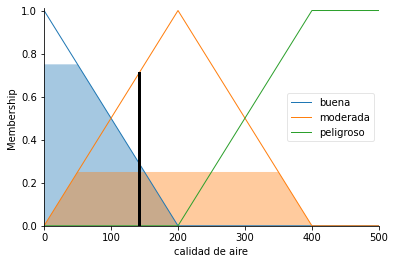

In [ ]:
# imprimir la salida defuzificada
quality.view(sim=air_quality)
calidad = air_quality.output['calidad de aire']
print("La calidad del aire es: ", calidad,
      "(Buena)" if (calidad>=0 and calidad<=100) else "" +
      "(Moderado)" if (calidad>100 and calidad<=299) else "" +
      "(Peligroso)" if (calidad>299 and calidad<=500) else "")